In [1]:
import pandas as pd
from os import path
pd.set_option('display.max_columns', 500)

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = '90fd8569f1ca4b9d9a18e7e88223ab4d'
secret = '7b628c530ff34158ae01b0494b85255d'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [26]:
# sp.search(q='year:2019', type='track', limit=50, offset=0)
# result = sp.tracks(['3eekarcy7kvN4yt5ZFzltW'])
result['tracks'][0]['album']
pd.io.json.json_normalize(result['tracks'][0]['album'])

album_type                                            artists  \
0     single  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  \
0  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...   

                               external_urls.spotify  \
0  https://open.spotify.com/album/2uDTi1PlpSpvAv7...   

                                                href                      id  \
0  https://api.spotify.com/v1/albums/2uDTi1PlpSpv...  2uDTi1PlpSpvAv7IRAoAEU   

                                              images                 name  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...  HIGHEST IN THE ROOM   

  release_date release_date_precision  total_tracks   type  \
0   2019-10-04                    day             1  album   

                                    uri  
0  spotify:album:2uDTi1PlpSpvAv7IRAoAEU

In [52]:
# get 10_000 songs from the year 2019 if available
def save_query_to_file(query_year='2019', type='track', filename='tracks.tsv', max_to_retrieve=10_000):

    # build the query string
    query_year = str(query_year)
    query = 'year:' + query_year
    
    columns_to_save = [
        'artist_name',
        'track_name',
        'track_year',
        'track_id',
        'explicit',
        'popularity'
    ]
    
    # make a header if the file does not exist
    if not path.exists(filename):
        with open (filename, 'a') as csv:
            csv.write( '\t'.join(columns_to_save) + '\n')
    
    for offset in range(0, max_to_retrieve, 50):

        # query for tracks in 2019 json
        track_results = sp.search(q=query, type=type, limit=50, offset=offset)

        for i, track in enumerate(track_results['tracks']['items']):
            artist_name = str(track['artists'][0]['name'])
            track_name  = str(track['name'])
            track_id    = str(track['id'])
            popularity  = str(track['popularity'])
            explicit    = str(track['explicit'])
            
            # add a row for the track in the csv
            with open(filename, 'a') as csv:
                line = '\t'.join([
                    artist_name, 
                    track_name, 
                    query_year, 
                    track_id, 
                    explicit, 
                    popularity
                ]) + '\n'
                csv.write(line)
                

In [53]:
save_query_to_file(query_year=2018)

#### get audiofeatures for a list of track id_s

In [61]:
def get_audio_features(track_ids: list, filename='features.tsv', batchsize=50):
    "Request sound features from the Spotify API and save them in a tsv file"
    
    num_ids = len(track_ids)
    for offset in range(0, num_ids, batchsize):
        
        # query for the batch
        ids_batch = track_ids[offset:offset+batchsize]
        features = sp.audio_features(ids_batch)
        
        # remove the 'None's from the batch
        features = [ feature for feature in features if feature is not None ]
        
        # parse to dataframe and write to file
        df = pd.DataFrame(features)
        
        # append to the the file if it already exists
        if path.exists(filename):
            df.to_csv(filename, mode='a', header=False, sep='\t')
        else:
            df.to_csv(filename, sep='\t')
        

In [2]:
# get the audio features for each of our tracks
tracks = pd.read_csv('tracks.tsv', sep='\t')
# track_ids = list(tracks.track_id)
# get_audio_features(track_ids)

In [34]:
pd.merge(tracks, features, left_on='track_id', right_on='id')

artist_name  \
0                    Travis Scott   
1                    Travis Scott   
2                     Post Malone   
3                     Post Malone   
4                      Juice WRLD   
5                      Juice WRLD   
6                    Selena Gomez   
7                    Selena Gomez   
8                       YNW Melly   
9                       YNW Melly   
10                      blackbear   
11                      blackbear   
12                          Lizzo   
13                          Lizzo   
14                  Lewis Capaldi   
15                  Lewis Capaldi   
16                       Maroon 5   
17                       Maroon 5   
18                     Dan + Shay   
19                     Dan + Shay   
20                     Kanye West   
21                     Kanye West   
22                     NLE Choppa   
23                     NLE Choppa   
24                          Drake   
25                          Drake   
26                     Young Thug   
27                     Young Thug   
28                   Harry Styles   
29                   Harry Styles   
...                           ...   
20156              French Montana   
20157  YoungBoy Never Broke Again   
20158             Alfie Templeman   
20159               Tom MacDonald   
20160                   Roo Panes   
20161             Kota the Friend   
20162         Perdidos De Sinaloa   
20163                    RL Grime   
20164            Clayton Jennings   
20165               Chloe x Halle   
20166                  Ed Shields   
20167               Funnel Vision   
20168                 Grey Henson   
20169            Chantel Jeffries   
20170                        Smuv   
20171                 Nicki Minaj   
20172                     Nosnija   
20173                Alessia Cara   
20174                   Yoke Lore   
20175                     HM Surf   
20176                  Kim Petras   
20177                        Wolf   
20178                 Sir, Please   
20179             Figaro Castello   
20180                        ZAYN   
20181                 Alex Lustig   
20182                   Badflower   
20183                 love-sadKID   
20184                    Vulfpeck   
20185                      Hollyn   

                                              track_name  track_year  \
0                                    HIGHEST IN THE ROOM        2019   
1                                    HIGHEST IN THE ROOM        2019   
2                                                Circles        2019   
3                                                Circles        2019   
4               Bandit (with YoungBoy Never Broke Again)        2019   
5               Bandit (with YoungBoy Never Broke Again)        2019   
6                                    Lose You To Love Me        2019   
7                                    Lose You To Love Me        2019   
8                                223's (feat. 9lokknine)        2019   
9                                223's (feat. 9lokknine)        2019   
10                                       hot girl bummer        2019   
11                                       hot girl bummer        2019   
12                                           Truth Hurts        2019   
13                                           Truth Hurts        2019   
14                                     Someone You Loved        2019   
15                                     Someone You Loved        2019   
16                                              Memories        2019   
17                                              Memories        2019   
18                     10,000 Hours (with Justin Bieber)        2019   
19                     10,000 Hours (with Justin Bieber)        2019   
20                                            Follow God        2019   
21                                            Follow God        2019   
22                                               Camelot        2019   

In [30]:
features = pd.read_csv('features.tsv', sep='\t')
pd

Unnamed: 0  acousticness  \
0               0      0.054600   
1               1      0.192000   
2               2      0.068700   
3               3      0.576000   
4               4      0.038900   
5               5      0.128000   
6               6      0.110000   
7               7      0.751000   
8               8      0.837000   
9               9      0.153000   
10             10      0.000248   
11             11      0.084900   
12             12      0.101000   
13             13      0.063000   
14             14      0.042600   
15             15      0.090600   
16             16      0.456000   
17             17      0.020400   
18             18      0.052200   
19             19      0.113000   
20             20      0.328000   
21             21      0.060800   
22             22      0.189000   
23             23      0.058800   
24             24      0.153000   
25             25      0.054500   
26             26      0.342000   
27             27      0.123000   
28             28      0.037000   
29             29      0.097600   
...           ...           ...   
20156          20      0.048100   
20157          21      0.005320   
20158          22      0.140000   
20159          23      0.544000   
20160          24      0.847000   
20161          25      0.585000   
20162          26      0.591000   
20163          27      0.308000   
20164          28      0.448000   
20165          29      0.114000   
20166          30      0.775000   
20167          31      0.016900   
20168          32      0.387000   
20169          33      0.664000   
20170          34      0.815000   
20171          35      0.132000   
20172          36      0.893000   
20173          37      0.048300   
20174          38      0.256000   
20175          39      0.865000   
20176          40      0.002150   
20177          41      0.714000   
20178          42      0.009330   
20179          43      0.989000   
20180          44      0.358000   
20181          45      0.909000   
20182          46      0.000891   
20183          47      0.358000   
20184          48      0.042200   
20185          49      0.280000   

                                            analysis_url  danceability  \
0      https://api.spotify.com/v1/audio-analysis/3eek...         0.598   
1      https://api.spotify.com/v1/audio-analysis/21jG...         0.695   
2      https://api.spotify.com/v1/audio-analysis/6Gg1...         0.474   
3      https://api.spotify.com/v1/audio-analysis/1HfM...         0.505   
4      https://api.spotify.com/v1/audio-analysis/4sji...         0.931   
5      https://api.spotify.com/v1/audio-analysis/7aiC...         0.778   
6      https://api.spotify.com/v1/audio-analysis/5qmq...         0.715   
7      https://api.spotify.com/v1/audio-analysis/7qEH...         0.501   
8      https://api.spotify.com/v1/audio-analysis/2b8f...         0.764   
9      https://api.spotify.com/v1/audio-analysis/2wrJ...         0.654   
10     https://api.spotify.com/v1/audio-analysis/2QpG...         0.529   
11     https://api.spotify.com/v1/audio-analysis/4sWu...         0.787   
12     https://api.spotify.com/v1/audio-analysis/5ry2...         0.831   
13     https://api.spotify.com/v1/audio-analysis/5Z8H...         0.855   
14     https://api.spotify.com/v1/audio-analysis/2plL...         0.585   
15     https://api.spotify.com/v1/audio-analysis/7CZy...         0.499   
16     https://api.spotify.com/v1/audio-analysis/0t3Z...         0.548   
17     https://api.spotify.com/v1/audio-analysis/1lOe...         0.745   
18     https://api.spotify.com/v1/audio-analysis/1ZPW...         0.621   
19     https://api.spotify.com/v1/audio-analysis/0fyS...         0.768   
20     https://api.spotify.com/v1/audio-analysis/2Fxm...         0.701   
21     https://api.spotify.com/v1/audio-analysis/2gwk...         0.876   
22     https://api.spotify.com/v1/audio-analysis/6Ozh...         0.769   
23     https://api.spotify.com/v1/audio-analysis/0Xek...    

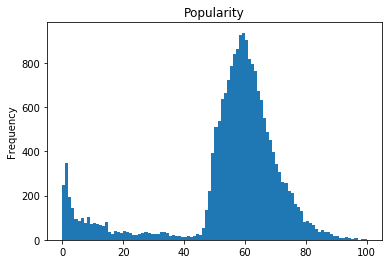

In [11]:
tracks.popularity.plot.hist(bins=100, title='Popularity')

In [15]:
sp.albums(['spotify:album:2uDTi1PlpSpvAv7IRAoAEU'])

{'albums': [{'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0Y5tJX1MQlPlqiwlOH1tJY'},
     'href': 'https://api.spotify.com/v1/artists/0Y5tJX1MQlPlqiwlOH1tJY',
     'id': '0Y5tJX1MQlPlqiwlOH1tJY',
     'name': 'Travis Scott',
     'type': 'artist',
     'uri': 'spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
    'NZ',
    'OM',
    'PA',
    'PE',
    'PH',
    'PL',
    'PS',


In [39]:
def get_album_data_from_track_ids(track_ids, filename='track_albums.tsv', batchsize=50):
    
    num_ids = len(track_ids)
    for offset in range(0, num_ids, batchsize):
        
        # query for the batch
        ids_batch = track_ids[offset:offset+batchsize]
        response = sp.tracks(ids_batch)
        tracks = response['tracks'] 
        
        # parse all results to dataframe
        dfs = []
        for index, track in enumerate(tracks):
            if track is not None:
                df = pd.io.json.json_normalize(track['album'])
                df['track_id'] = track_ids[index]
                dfs.append(df)
        df = pd.concat(dfs)
        
        # append to the the file if it already exists
        if path.exists(filename):
            df.to_csv(filename, mode='a', header=False, sep='\t')
        else:
            df.to_csv(filename, sep='\t')
            


In [40]:
# get_album_data_from_track_ids(list(tracks.track_id))

In [41]:
pd.read_csv('track_albums.tsv', sep='\t')

Unnamed: 0   album_type  \
0               0       single   
1               0        album   
2               0       single   
3               0       single   
4               0       single   
5               0       single   
6               0        album   
7               0        album   
8               0       single   
9               0       single   
10              0        album   
11              0       single   
12              0       single   
13              0        album   
14              0       single   
15              0        album   
16              0        album   
17              0        album   
18              0       single   
19              0        album   
20              0        album   
21              0        album   
22              0        album   
23              0        album   
24              0       single   
25              0        album   
26              0       single   
27              0        album   
28              0       single   
29              0        album   
...           ...          ...   
19970           0       single   
19971           0        album   
19972           0       single   
19973           0       single   
19974           0       single   
19975           0        album   
19976           0        album   
19977           0        album   
19978           0        album   
19979           0        album   
19980           0       single   
19981           0       single   
19982           0  compilation   
19983           0       single   
19984           0        album   
19985           0        album   
19986           0        album   
19987           0        album   
19988           0       single   
19989           0        album   
19990           0        album   
19991           0       single   
19992           0       single   
19993           0       single   
19994           0        album   
19995           0       single   
19996           0       single   
19997           0       single   
19998           0        album   
19999           0       single   

                                                 artists  \
0      [{'external_urls': {'spotify': 'https://open.s...   
1      [{'external_urls': {'spotify': 'https://open.s...   
2      [{'external_urls': {'spotify': 'https://open.s...   
3      [{'external_urls': {'spotify': 'https://open.s...   
4      [{'external_urls': {'spotify': 'https://open.s...   
5      [{'external_urls': {'spotify': 'https://open.s...   
6      [{'external_urls': {'spotify': 'https://open.s...   
7      [{'external_urls': {'spotify': 'https://open.s...   
8      [{'external_urls': {'spotify': 'https://open.s...   
9      [{'external_urls': {'spotify': 'https://open.s...   
10     [{'external_urls': {'spotify': 'https://open.s...   
11     [{'external_urls': {'spotify': 'https://open.s...   
12     [{'external_urls': {'spotify': 'https://open.s...   
13     [{'external_urls': {'spotify': 'https://open.s...   
14     [{'external_urls': {'spotify': 'https://open.s...   
15     [{'external_urls': {'spotify': 'https://open.s...   
16     [{'external_urls': {'spotify': 'https://open.s...   
17     [{'external_urls': {'spotify': 'https://open.s...   
18     [{'external_urls': {'spotify': 'https://open.s...   
19     [{'external_urls': {'spotify': 'https://open.s...   
20     [{'external_urls': {'spotify': 'https://open.s...   
21     [{'external_urls': {'spotify': 'https://open.s...   
22     [{'external_urls': {'spotify': 'https://open.s...   
23     [{'external_urls': {'spotify': 'https://open.s...   
24     [{'external_urls': {'spotify': 'https://open.s...   
25     [{'external_urls': {'spotify': 'https://open.s...   
26     [{'external_urls': {'spotify': 'https://open.s...   
27     [{'external_urls': {'spotify': 'https://open.s...   
28     [{'external_urls': {'spotify': 'https://open.s...   
29     [{'external_urls': {'spotify': 'https://open.s...   
...                                   

In [43]:
result = sp.albums(['spotify:album:3t6Z2qoBVCS4NHNI25XECH'])

In [49]:
pd.io.json.json_normalize(result['albums'])

album_type                                            artists  \
0     single  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  \
0  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...   

                                          copyrights external_ids.upc  \
0  [{'text': '© 2019 Grade A Productions, LLC, un...   00602508383366   

                               external_urls.spotify genres  \
0  https://open.spotify.com/album/3t6Z2qoBVCS4NHN...     []   

                                                href                      id  \
0  https://api.spotify.com/v1/albums/3t6Z2qoBVCS4...  3t6Z2qoBVCS4NHNI25XECH   

                                              images  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...   

                                    label  \
0  Grade A Productions/Interscope Records   

                                       name  popularity release_date  \
0  Bandit (with YoungBoy Never Broke Again)          84   2019-10-04   

  release_date_precision  total_tracks  \
0                    day             1   

                                         tracks.href  \
0  https://api.spotify.com/v1/albums/3t6Z2qoBVCS4...   

                                        tracks.items  tracks.limit  \
0  [{'artists': [{'external_urls': {'spotify': 'h...            50   

  tracks.next  tracks.offset tracks.previous  tracks.total   type  \
0        None              0            None             1  album   

                                    uri  
0  spotify:album:3t6Z2qoBVCS4NHNI25XECH

In [72]:
def get_album_data_from_track_ids(album_uris, track_ids, filename='albums.tsv', batchsize=10):
    
    num_uris = len(album_uris)
    
    all_dfs = []
    
    for offset in range(0, num_uris, batchsize):
        
        # query for the batch
        uris_batch = album_uris[offset:offset+batchsize]
        response = sp.albums(uris_batch)
        albums = response['albums'] 
        
        # parse all results to dataframe
        dfs = []
        for index, album in enumerate(albums):
            if album is not None:
                df = pd.io.json.json_normalize(album)
                df['track_id'] = track_ids[index]
                dfs.append(df)
        df = pd.concat(dfs)
        all_dfs.append(df)
        
        # append to the the file if it already exists
        if path.exists(filename):
            df.to_csv(filename, mode='a', header=False, sep='\t')
        else:
            df.to_csv(filename, sep='\t')
            
    return pd.concat(all_dfs)

In [73]:
album_data = pd.read_csv('track_albums.tsv', sep='\t')
albums_df = get_album_data_from_track_ids(
    album_uris=list(album_data.uri),
    track_ids =list(album_data.track_id)
)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [63]:
# pd.read_csv('albums.tsv', sep='\t')
with open('albums.tsv', 'r') as old, open('cleaned_albums.tsv', 'w') as new:
    for line in old.readlines():
        new.write(line.lstrip('0').lstrip('\t'))

In [85]:
# pd.read_csv('cleaned_albums.tsv', sep='\t')

In [80]:
albums_df.to_csv('albums.tsv', sep='\t')

In [81]:
# pd.read_csv('albums.tsv', sep='\t')

Unnamed: 0   album_type  \
0               0       single   
1               0        album   
2               0       single   
3               0       single   
4               0       single   
5               0       single   
6               0        album   
7               0        album   
8               0       single   
9               0       single   
10              0        album   
11              0       single   
12              0       single   
13              0        album   
14              0       single   
15              0        album   
16              0        album   
17              0        album   
18              0       single   
19              0        album   
20              0        album   
21              0        album   
22              0        album   
23              0        album   
24              0       single   
25              0        album   
26              0       single   
27              0        album   
28              0       single   
29              0        album   
...           ...          ...   
19970           0       single   
19971           0        album   
19972           0       single   
19973           0       single   
19974           0       single   
19975           0        album   
19976           0        album   
19977           0        album   
19978           0        album   
19979           0        album   
19980           0       single   
19981           0       single   
19982           0  compilation   
19983           0       single   
19984           0        album   
19985           0        album   
19986           0        album   
19987           0        album   
19988           0       single   
19989           0        album   
19990           0        album   
19991           0       single   
19992           0       single   
19993           0       single   
19994           0        album   
19995           0       single   
19996           0       single   
19997           0       single   
19998           0        album   
19999           0       single   

                                                 artists  \
0      [{'external_urls': {'spotify': 'https://open.s...   
1      [{'external_urls': {'spotify': 'https://open.s...   
2      [{'external_urls': {'spotify': 'https://open.s...   
3      [{'external_urls': {'spotify': 'https://open.s...   
4      [{'external_urls': {'spotify': 'https://open.s...   
5      [{'external_urls': {'spotify': 'https://open.s...   
6      [{'external_urls': {'spotify': 'https://open.s...   
7      [{'external_urls': {'spotify': 'https://open.s...   
8      [{'external_urls': {'spotify': 'https://open.s...   
9      [{'external_urls': {'spotify': 'https://open.s...   
10     [{'external_urls': {'spotify': 'https://open.s...   
11     [{'external_urls': {'spotify': 'https://open.s...   
12     [{'external_urls': {'spotify': 'https://open.s...   
13     [{'external_urls': {'spotify': 'https://open.s...   
14     [{'external_urls': {'spotify': 'https://open.s...   
15     [{'external_urls': {'spotify': 'https://open.s...   
16     [{'external_urls': {'spotify': 'https://open.s...   
17     [{'external_urls': {'spotify': 'https://open.s...   
18     [{'external_urls': {'spotify': 'https://open.s...   
19     [{'external_urls': {'spotify': 'https://open.s...   
20     [{'external_urls': {'spotify': 'https://open.s...   
21     [{'external_urls': {'spotify': 'https://open.s...   
22     [{'external_urls': {'spotify': 'https://open.s...   
23     [{'external_urls': {'spotify': 'https://open.s...   
24     [{'external_urls': {'spotify': 'https://open.s...   
25     [{'external_urls': {'spotify': 'https://open.s...   
26     [{'external_urls': {'spotify': 'https://open.s...   
27     [{'external_urls': {'spotify': 'https://open.s...   
28     [{'external_urls': {'spotify': 'https://open.s...   
29     [{'external_urls': {'spotify': 'https://open.s...   
...                                   

In [84]:
(albums_df.genres.apply(lambda l: len(l)) > 0).sum()

0

In [ ]:
albums